# 3D Viewer

In [2]:
%pylab ipympl
import imshow_slider as ims
from topas2numpy import BinnedResult
import random
import change_topas_view as ctv
import pickle

Populating the interactive namespace from numpy and matplotlib


### File Names

In [58]:
array_name = '../Topas/Kernels/WaterKernel13.csv'

In [2]:
array_name = '../Topas/Kernels/BoneKernel4.csv'

In [64]:
array_name = '../Topas/Kernels/LungKernel1.csv'

In [46]:
array_name = '../Topas/LungKernel1.csv'

In [3]:
array_name = '../Topas/TestingDose4Fluence.csv'

In [77]:
array = pickle.load(open('energy_deposition_water.pickle','rb'))

### Other Parameters

In [4]:
# kernel or array size 
kernel_size = 4 # cm 

# x slice for graphs that take a slice
x_val = 24

# what values to contour in the contour plot
# contours = [1.e-6,1.e-5,1.e-4,1.e-3,1.e-2,1.e-1,1]
# contours = [1*10**(-n) for n in range(30,-1,-1)]
contours = [1.e-4,1.e-3,1.e-2,1.e-1,0.25,0.5,1]

# take array as a fraction of max?
frac_max = True

### Code Setup

In [5]:
array = BinnedResult(array_name).data['Sum']

In [6]:
if frac_max:
    array = array/np.max(array)

if len(contours) <= 7:
    colours_all = ['red','orange','yellow','green','blue','indigo','violet']
else:
    colours_all = ['aliceblue', 'aqua', 'aquamarine', 'azure','blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightgreen', 'lightgrey', 'lightpink', 'lightsalmon', 'lightseagreen', 'lightskyblue', 'lightslategray', 'lightslategrey', 'lightsteelblue', 'lightyellow', 'lime', 'limegreen', 'linen', 'magenta', 'maroon', 'mediumaquamarine', 'mediumblue', 'mediumorchid', 'mediumpurple', 'mediumseagreen', 'mediumslateblue', 'mediumspringgreen', 'mediumturquoise', 'mediumvioletred', 'midnightblue', 'mintcream', 'mistyrose', 'moccasin', 'navajowhite', 'navy', 'oldlace', 'olive', 'olivedrab', 'orange', 'orangered', 'orchid', 'palegoldenrod', 'palegreen', 'paleturquoise', 'palevioletred', 'papayawhip', 'peachpuff', 'peru', 'pink', 'plum', 'powderblue', 'purple', 'rebeccapurple', 'red', 'rosybrown', 'royalblue', 'saddlebrown', 'salmon', 'sandybrown', 'seagreen', 'seashell', 'sienna', 'silver', 'skyblue', 'slateblue', 'slategray', 'slategrey', 'snow', 'springgreen', 'steelblue', 'tan', 'teal', 'thistle', 'tomato', 'turquoise', 'violet', 'wheat', 'white', 'whitesmoke', 'yellow', 'yellowgreen']
    random.shuffle(colours_all)
colours = colours_all[:len(contours)]

voxel_size = kernel_size/len(array)

y = linspace((-len(array)//2)*voxel_size,(len(array)-1)*voxel_size-(len(array)//2)*voxel_size,len(array))
z = linspace((-len(array)//2)*voxel_size,(len(array)-1)*voxel_size-(len(array)//2)*voxel_size,len(array))
yv,zv = meshgrid(y,z)

### Slice Image 

Text(0.5, 1.0, 'View of Kernel at x=24th Voxel')

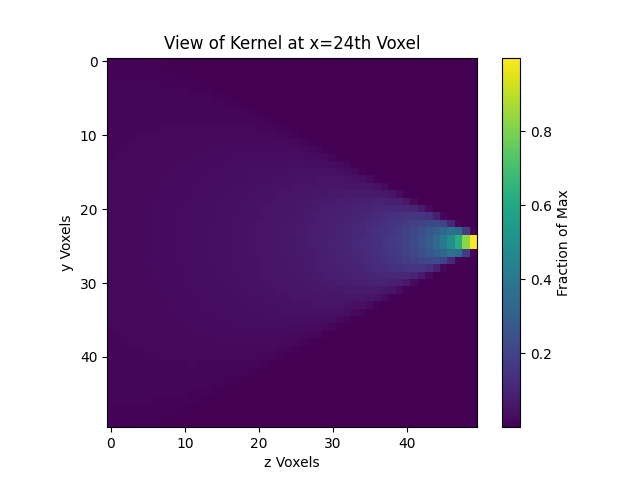

In [7]:
ifig=1;close(ifig);figure(ifig)
imshow(array[x_val])
cbar=colorbar()
cbar.set_label('Fraction of Max')
xlabel('z Voxels')
ylabel('y Voxels')
title('View of Kernel at x=' + str(x_val) + 'th Voxel' )

### Slice Contour Plot

Text(0.5, 1.0, 'View of Kernel at x=24th (centre) Voxel')

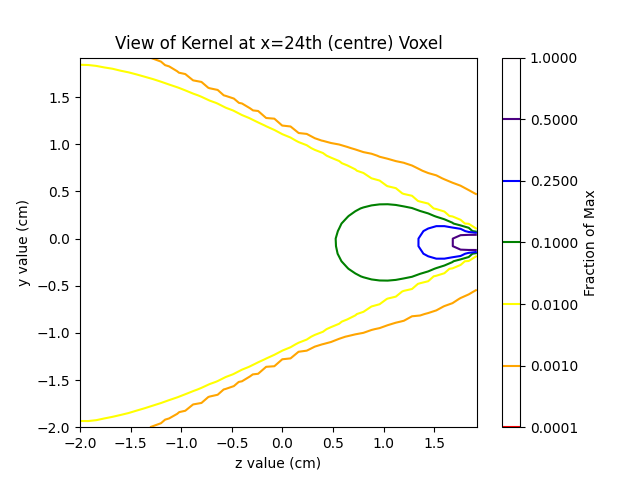

In [8]:
import matplotlib.pyplot as plt
ifig=2;close(ifig);fig = plt.figure(ifig)
CS = plt.contour(yv,zv,array[x_val],levels=contours,colors=colours)
# CS = plt.contour(array[x_val],levels=contours,cmap='winter',norm=array(contours).Normalize())
# plt.clabel(CS,inline=1,fontsize=8)
cbar=colorbar()
cbar.set_label('Fraction of Max')
xlabel('z value (cm)')
ylabel('y value (cm)')
title('View of Kernel at x=' + str(x_val) + 'th (centre) Voxel' )

### Image with Slider 

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:>,
 <mpl_interactions.controller.Controls at 0x7f519090c320>)

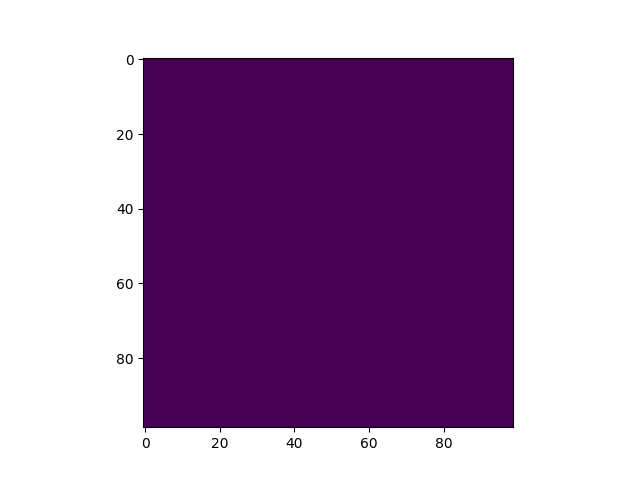

In [8]:
ims.slider(array)

### Contour View for 3 dimensions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The following kwargs were not used by contour: 'autoscale_on'
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The following kwargs were not used by contour: 'autoscale_on'
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'autoscale_on'
  from ipykernel import kernelapp as app


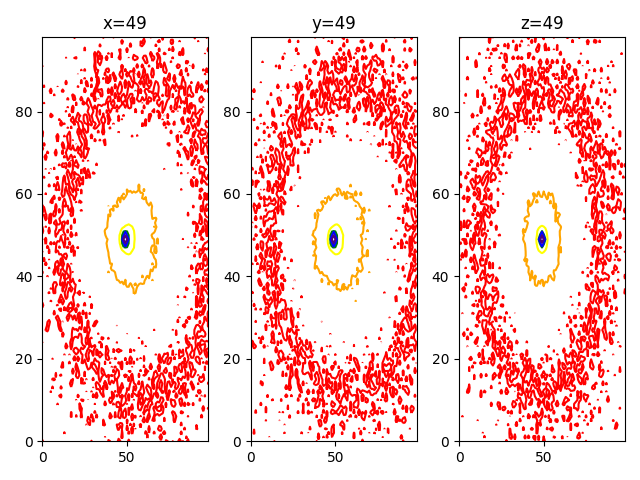

In [14]:
x_array = array 
y_array = ctv.change_view('y',array)
z_array = ctv.change_view('z',array)

ifig=5;close(ifig);fig = plt.figure(ifig)
subplot(1,3,1,sharex=gca(), sharey=gca())
CS1 = plt.contour(x_array[x_val],levels=contours,colors=colours,autoscale_on=True)
title('x=' + str(x_val))

subplot(1,3,2,sharex=gca(), sharey=gca())
CS2 = plt.contour(y_array[x_val],levels=contours,colors=colours,autoscale_on=True)
title('y=' + str(x_val))

subplot(1,3,3,sharex=gca(), sharey=gca())
CS3 = plt.contour(z_array[x_val],levels=contours,colors=colours,autoscale_on=True)
title('z=' + str(x_val))

tight_layout()

## Comparison of Multiple Kernels
(Up to three)

### File Names

In [96]:
filenames = ['../Topas/Kernels/WaterKernel13.csv','../Topas/Kernels/LungKernel1.csv','../Topas/Kernels/BoneKernel4.csv']

In [91]:
arrays = [pickle.load(open('energy_deposition_water.pickle','rb')),pickle.load(open('energy_deposition_lung.pickle','rb')),pickle.load(open('energy_deposition_bone.pickle','rb'))]
filenames = ['../Topas/Kernels/Water.csv','../Topas/Kernels/Lung.csv','../Topas/Kernels/Bone.csv']

### Other Parameters

In [97]:
# kernel or array size 
kernel_size = 4 # cm 

# x slice for graphs that take a slice
x_val = 49

# what values to contour in the contour plot
contours = [1.e-6,1.e-5,1.e-4,1.e-3,1.e-2,1.e-1,1]
# contours = [1.e-3,1.e-2,1.e-1,1]
# contours = [1*10**(-n) for n in range(30,-1,-1)]
# contours = [1.e-4,1.e-3,1.e-2,1.e-1,0.25,0.5,1]

# take array as a fraction of max?
frac_max = True

### Code Setup

In [98]:
arrays = [BinnedResult(array_name).data['Sum'] for array_name in filenames]

In [99]:
if frac_max:
    for index in range(len(arrays)):
        arrays[index] = arrays[index]/np.max(arrays[index])

if len(contours) <= 7:
    colours_all = ['red','orange','yellow','green','blue','indigo','violet']
else:
    colours_all = ['aliceblue', 'aqua', 'aquamarine', 'azure','blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightgreen', 'lightgrey', 'lightpink', 'lightsalmon', 'lightseagreen', 'lightskyblue', 'lightslategray', 'lightslategrey', 'lightsteelblue', 'lightyellow', 'lime', 'limegreen', 'linen', 'magenta', 'maroon', 'mediumaquamarine', 'mediumblue', 'mediumorchid', 'mediumpurple', 'mediumseagreen', 'mediumslateblue', 'mediumspringgreen', 'mediumturquoise', 'mediumvioletred', 'midnightblue', 'mintcream', 'mistyrose', 'moccasin', 'navajowhite', 'navy', 'oldlace', 'olive', 'olivedrab', 'orange', 'orangered', 'orchid', 'palegoldenrod', 'palegreen', 'paleturquoise', 'palevioletred', 'papayawhip', 'peachpuff', 'peru', 'pink', 'plum', 'powderblue', 'purple', 'rebeccapurple', 'red', 'rosybrown', 'royalblue', 'saddlebrown', 'salmon', 'sandybrown', 'seagreen', 'seashell', 'sienna', 'silver', 'skyblue', 'slateblue', 'slategray', 'slategrey', 'snow', 'springgreen', 'steelblue', 'tan', 'teal', 'thistle', 'tomato', 'turquoise', 'violet', 'wheat', 'white', 'whitesmoke', 'yellow', 'yellowgreen']
    random.shuffle(colours_all)
colours = colours_all[:len(contours)]

voxel_size = kernel_size/len(arrays[0])

y = linspace((-len(arrays[0])//2)*voxel_size,(len(arrays[0])-1)*voxel_size-(len(arrays[0])//2)*voxel_size,len(arrays[0]))
z = linspace((-len(arrays[0])//2)*voxel_size,(len(arrays[0])-1)*voxel_size-(len(arrays[0])//2)*voxel_size,len(arrays[0]))
yv,zv = meshgrid(y,z)

### Slice Contour Plot

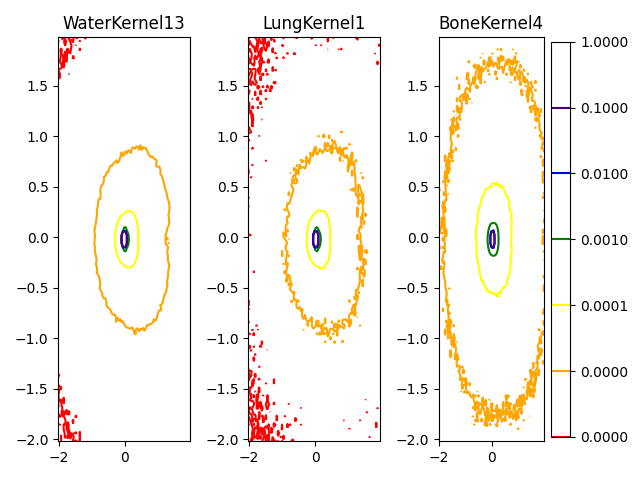

In [102]:
import matplotlib.pyplot as plt
ifig=6;close(ifig);fig = plt.figure(ifig)

for index in range(len(arrays)):
    subplot(1,len(arrays),index+1,sharex=gca(), sharey=gca(),autoscale_on=True)
    CS = plt.contour(yv,zv,arrays[index][x_val],levels=contours,colors=colours)
    # CS = plt.contour(array[x_val],levels=contours,cmap='winter',norm=array(contours).Normalize())
    # plt.clabel(CS,inline=1,fontsize=8)
    if index == len(arrays)-1:
        cbar=colorbar()
    # cbar.set_label('Fraction of Max')
    # xlabel('z value (cm)')
    # ylabel('y value (cm)')
    # title('View of Kernel at x=' + str(x_val) + 'th (centre) Voxel' )
    title(filenames[index][17:-4])

tight_layout()

### Slice Image Plot

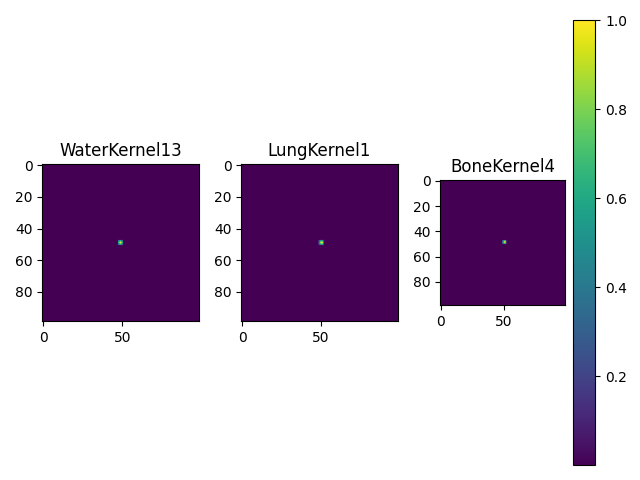

In [103]:
ifig=6;close(ifig);figure(ifig)

for index in range(len(arrays)):
    subplot(1,len(arrays),index+1,sharex=gca(), sharey=gca(),autoscale_on=True)
    imshow(arrays[index][x_val])
    if index == len(arrays)-1:
        cbar=colorbar()
    # cbar.set_label('Fraction of Max')
    # xlabel('z value (cm)')
    # ylabel('y value (cm)')
    # title('View of Kernel at x=' + str(x_val) + 'th (centre) Voxel' )
    title(filenames[index][17:-4])

tight_layout()

In [106]:
shape(arrays[2])

(99, 99, 99)

Text(0.5, 1.0, 'percent difference at x=19')

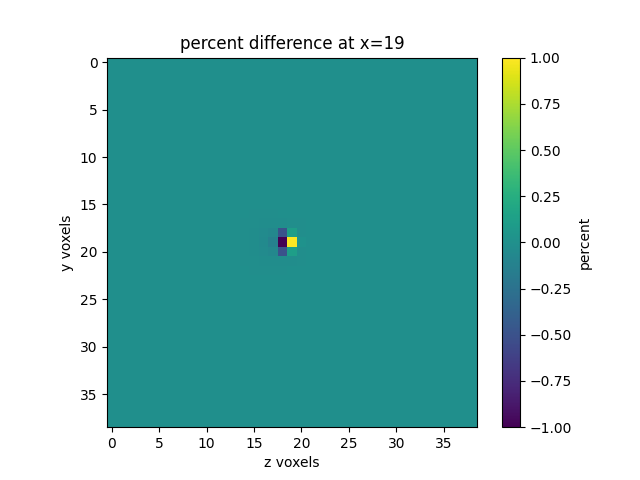

In [27]:
mini=-1
maxi=1

close(7);figure(7)
# imshow((my_dose_array[x_val]*conversion-mc_dose_array[x_val])/np.mean(array(np.mean(mc_dose_array[x_val]),np.mean(my_dose_array[x_val]*conversion))),vmin=mini,vmax=maxi)
diff = (arrays[0][x_val]-arrays[1][x_val])/np.max([arrays[0],arrays[1]])*100
imshow(diff,vmin=mini,vmax=maxi)
cbar=colorbar()
cbar.set_label('percent')
xlabel('z voxels')
ylabel('y voxels')
title('percent difference at x=' + str(x_val))

Text(0.5, 1.0, 'View of Kernel at x=49th (centre) Voxel')

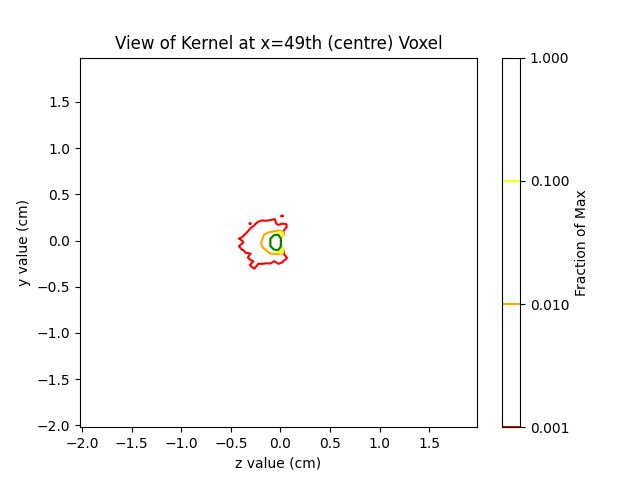

In [18]:
ifig=8;close(ifig);fig = plt.figure(ifig)
CS = plt.contour(yv,zv,diff,levels=contours,colors=colours)
# CS = plt.contour(array[x_val],levels=contours,cmap='winter',norm=array(contours).Normalize())
# plt.clabel(CS,inline=1,fontsize=8)
cbar=colorbar()
cbar.set_label('Fraction of Max')
xlabel('z value (cm)')
ylabel('y value (cm)')
title('View of Kernel at x=' + str(x_val) + 'th (centre) Voxel' )

## Extra Resources
https://matplotlib.org/stable/gallery/color/named_colors.html

In [38]:
import matplotlib.colors as mcolors
# mcolors.CSS4_COLORS.keys()
# mcolors.TABLEAU_COLORS
# mcolors.BASE_COLORS